In [1]:
import numpy as np
import pandas as pd
import glob
import math
import statistics
import scipy.stats as stats
import pickle
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

In [18]:
dic = pickle.load( open( "../JET_OUT/jettrack_1D.p", "rb" ) )

In [3]:
def is_winter(month):
    return (month == 6) | (month == 7) | (month == 8)# | (month == 5) | (month == 9) | (month == 4)

In [4]:
def getrange(numbers):
    return max(numbers) - min(numbers)

In [19]:
monthly={}
annual={}
winter={}
seasonal={}
for index in dic:
    annual[index] = pd.DataFrame(pd.to_numeric(dic[index].set_index('years').lat).groupby(level='years').mean())
    annual[index]['ua'] = pd.to_numeric(dic[index].set_index('years').ua).groupby(level='years').mean()
    annual[index]['width'] = pd.to_numeric(dic[index].set_index('years').width).groupby(level='years').mean()
    annual[index]['pr'] = pd.to_numeric(dic[index].set_index('years').pr).groupby(level='years').mean()
    monthly[index] = pd.DataFrame(pd.to_numeric(dic[index].set_index(['years','months']).lat).groupby(['years','months']).mean())
    monthly[index]['ua'] = pd.to_numeric(dic[index].set_index(['years','months']).ua).groupby(['years','months']).mean()
    monthly[index]['width'] = pd.to_numeric(dic[index].set_index(['years','months']).width).groupby(['years','months']).mean()
    monthly[index]['pr'] = pd.to_numeric(dic[index].set_index(['years','months']).pr).groupby(['years','months']).mean()
    winter[index] = pd.DataFrame(pd.to_numeric(dic[index].where(is_winter(dic[index].months)).dropna().set_index('years').lat).groupby(level='years').mean())
    winter[index]['ua'] = pd.to_numeric(dic[index].where(is_winter(dic[index].months)).dropna().set_index('years').ua).groupby(level='years').mean()
    winter[index]['width'] = pd.to_numeric(dic[index].where(is_winter(dic[index].months)).dropna().set_index('years').width).groupby(level='years').mean()
    winter[index]['pr'] = pd.to_numeric(dic[index].where(is_winter(dic[index].months)).dropna().set_index('years').pr).groupby(level='years').mean()
    seasonal[index] = pd.DataFrame(pd.to_numeric(dic[index].set_index(['years','seasons']).lat).groupby(level=['years','seasons']).mean())
    seasonal[index]['ua'] = pd.to_numeric(dic[index].set_index(['years','seasons']).ua).groupby(level=['years','seasons']).mean()
    seasonal[index]['width'] = pd.to_numeric(dic[index].set_index(['years','seasons']).width).groupby(level=['years','seasons']).mean()
    seasonal[index]['pr'] = pd.to_numeric(dic[index].set_index(['years','seasons']).pr).groupby(level=['years','seasons']).mean()

In [6]:
results={}
for s,season in zip([1,2,3,4],['DJF','MAM','JJA','SON']):
    results[season]=[]
    for index in dic:
        #
        i = 1000
        #
        #latitude
        #
        x = np.linspace(min((np.min(dic[key].where(dic[key].seasons==s).dropna().lat) for key in dic)),max((np.max(dic[key].where(dic[key].seasons==s).dropna().lat) for key in dic)),int(i))
        bw = 1.059*np.min([np.std(dic['NOAA'].where(dic['NOAA'].seasons==s).dropna().lat),stats.iqr(dic['NOAA'].where(dic['NOAA'].seasons==s).dropna().lat)/1.34])*216**(-1/5.)
        kde = KernelDensity(kernel='gaussian', bandwidth=bw).fit(np.array(dic['NOAA'].where(dic['NOAA'].seasons==s).dropna().lat)[:, np.newaxis]) # replicates sns
        ref = np.exp(kde.score_samples(x[:, np.newaxis]))
        #
        bw = 1.059*np.min([np.std(dic[index].where(dic[index].seasons==s).dropna().lat),stats.iqr(dic[index].where(dic[index].seasons==s).dropna().lat)/1.34])*216**(-1/5.)
        kde = KernelDensity(kernel='gaussian', bandwidth=bw).fit(np.array(dic[index].where(dic[index].seasons==s).dropna().lat)[:, np.newaxis]) # replicates sns
        cmip = np.exp(kde.score_samples(x[:, np.newaxis]))
        #
        score = []
        scale = getrange(x)/i
        for j in range(len(ref)):
            score.append(abs(ref[j]-cmip[j])*scale)
        lat = np.sum(score)
        #
        #Velocity
        #
        x = np.linspace(min((np.min(dic[key].where(dic[key].seasons==s).dropna().ua) for key in dic)),max((np.max(dic[key].where(dic[key].seasons==s).dropna().ua) for key in dic)),int(i))
        bw = 1.059*np.min([np.std(dic['NOAA'].where(dic['NOAA'].seasons==s).dropna().ua),stats.iqr(dic['NOAA'].where(dic['NOAA'].seasons==s).dropna().ua)/1.34])*216**(-1/5.)
        kde = KernelDensity(kernel='gaussian', bandwidth=bw).fit(np.array(dic['NOAA'].where(dic['NOAA'].seasons==s).dropna().ua)[:, np.newaxis]) # replicates sns
        ref = np.exp(kde.score_samples(x[:, np.newaxis]))
        #
        bw = 1.059*np.min([np.std(dic[index].where(dic[index].seasons==s).dropna().ua),stats.iqr(dic[index].where(dic[index].seasons==s).dropna().ua)/1.34])*216**(-1/5.)
        kde = KernelDensity(kernel='gaussian', bandwidth=bw).fit(np.array(dic[index].where(dic[index].seasons==s).dropna().ua)[:, np.newaxis]) # replicates sns
        cmip = np.exp(kde.score_samples(x[:, np.newaxis]))
        #
        score = []
        scale = getrange(x)/i
        for j in range(len(ref)):
            score.append(abs(ref[j]-cmip[j])*scale)
        ua = np.sum(score)
        #Width
        #
        x = np.linspace(min((np.min(dic[key].where(dic[key].seasons==s).dropna().width) for key in dic)),max((np.max(dic[key].where(dic[key].seasons==s).dropna().width) for key in dic)),int(i))
        bw = 1.059*np.min([np.std(dic['NOAA'].where(dic['NOAA'].seasons==s).dropna().width),stats.iqr(dic['NOAA'].where(dic['NOAA'].seasons==s).dropna().width)/1.34])*216**(-1/5.)
        kde = KernelDensity(kernel='gaussian', bandwidth=bw).fit(np.array(dic['NOAA'].where(dic['NOAA'].seasons==s).dropna().width)[:, np.newaxis]) # replicates sns
        ref = np.exp(kde.score_samples(x[:, np.newaxis]))
        #
        bw = 1.059*np.min([np.std(dic[index].where(dic[index].seasons==s).dropna().width),stats.iqr(dic[index].where(dic[index].seasons==s).dropna().width)/1.34])*216**(-1/5.)
        kde = KernelDensity(kernel='gaussian', bandwidth=bw).fit(np.array(dic[index].where(dic[index].seasons==s).dropna().width)[:, np.newaxis]) # replicates sns
        cmip = np.exp(kde.score_samples(x[:, np.newaxis]))
        #
        score = []
        scale = getrange(x)/i
        for j in range(len(ref)):
            score.append(abs(ref[j]-cmip[j])*scale)
        width = np.sum(score)
        #
        results[season].append([index,lat,ua,width])

In [7]:
for index in results:
    results[index] = pd.DataFrame(results[index],columns=['Model','lat','ua', 'width'])
    results[index] = results[index].set_index('Model')

In [8]:
resultsfinal = results['DJF'] + results['MAM'] + results['JJA'] + results['SON']
resultsfinal = resultsfinal.sort_values('lat')

In [10]:
resultsfinal.to_csv('../JET_OUT/scores_1D.csv')

In [88]:
results_ks={}
for s,season in zip([1,2,3,4],['DJF','MAM','JJA','SON']):
    results_ks[season]=[]
    for index in dic:
        lat = stats.ks_2samp(np.array(dic['NOAA'].where(dic['NOAA'].seasons==s).dropna().lat.values), np.array(dic[index].where(dic[index].seasons==s).dropna().lat.values))
        ua = stats.ks_2samp(np.array(dic['NOAA'].where(dic['NOAA'].seasons==s).dropna().ua.values), np.array(dic[index].where(dic[index].seasons==s).dropna().ua.values))
        width = stats.ks_2samp(np.array(dic['NOAA'].where(dic['NOAA'].seasons==s).dropna().width.values), np.array(dic[index].where(dic[index].seasons==s).dropna().width.values))
        results_ks[season].append([index,lat[0], ua[0], width[0]])

In [89]:
for index in results_ks:
    results_ks[index] = pd.DataFrame(results_ks[index],columns=['Model','lat', 'ua', 'width'])
    results_ks[index] = results_ks[index].set_index('Model')

In [90]:
resultsfinal_ks = results_ks['DJF'] + results_ks['MAM'] + results_ks['JJA'] + results_ks['SON']
resultsfinal_ks = resultsfinal_ks.sort_values('lat')

In [91]:
resultsfinal_ks['lat_area_diff'] = resultsfinal.lat
resultsfinal_ks['ua_area_diff'] = resultsfinal.ua
resultsfinal_ks['width_area_diff'] = resultsfinal.width

In [92]:
import seaborn as sns

In [93]:
def getnormalizerd(df):
    normalized_df=(df-df.min())/(df.max()-df.min())
    return normalized_df

In [94]:
resultsfinal_ks = getnormalizerd(resultsfinal_ks)

In [97]:
df = resultsfinal_ks
df = df.reindex(sorted(df.columns), axis=1)

Text(0.5, 1.0, 'Jet Stream Scores')

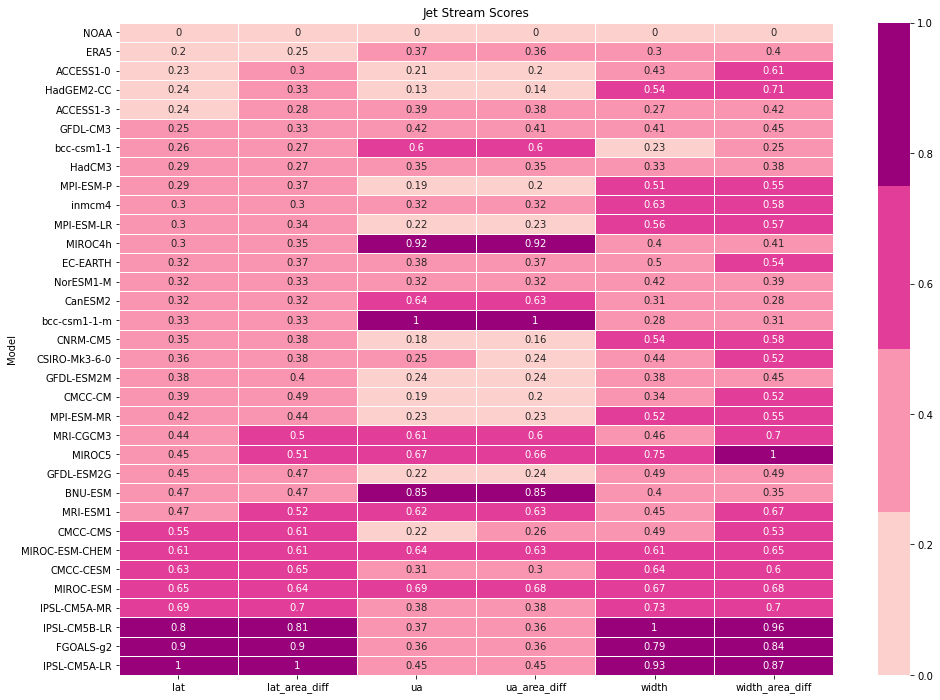

In [99]:
f, ax = plt.subplots(figsize=(16,12))
map = sns.heatmap(df.round(3),cmap=sns.color_palette("RdPu", 4), annot=True, linewidths=.5, ax=ax, xticklabels=1, yticklabels=1)
#map.set_xticklabels(['Velocity','Width','Latitude', ],rotation=45,horizontalalignment='right')
plt.title('Jet Stream Scores')